<a href="https://colab.research.google.com/github/sunilbssengg/code-deploy-website-main/blob/main/Telecome_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*** "Here, I am filling the data to analyze the KPI degradation report. We will plot the relationship between the different KPIs so that we can identify which KPI parameters are causing the degradation."***\

***First read the KPI raw data file which are fetch fom USM***

In [108]:
df_customer= pd.read_csv("/content/telecom_ran_dataset1.csv")
df_customer.head(10)
#print(df1)
#df_customer.info()
#df_customer.isnull().sum()
# it will count the number of 0 and 1




,Site_ID,Technology,Vendor,Region,RRC_Success_Rate,ERAB_Drop_Rate,DL_Throughput,UL_Throughput,PRB_Utilization_DL,PRB_Utilization_UL,...,Critical_Alarms_Count,Major_Alarms_Count,VSWR_Alarm,GPS_Sync_Alarm,Transmission_Alarm,CPU_Utilization,Memory_Usage,DL_User_Count,UL_User_Count,Cell_Health
0,NY_Site1,4G,Samsung,NewYork,94.041007,4.049301,118.180624,13.122588,70.277901,68.071908,...,1,7,1,0,1,88.144449,38.442829,93,246,1
1,Chi_Site,3G,Nokia,Cincinnati,92.997656,4.736976,49.025471,43.448329,46.213575,7.678609,...,3,8,1,1,0,62.523026,81.981987,245,115,0
2,NY_Site2,5G,Ericsson,NewYork,92.008475,1.686701,50.195025,9.066793,36.820617,15.336447,...,1,8,0,0,1,78.870420,19.452444,270,184,0
3,NJ_Site1,5G,Samsung,NewJersy,78.983305,3.624906,5.455431,21.341122,66.293025,58.812236,...,3,2,0,1,1,10.310300,34.853480,227,27,0
4,Taxes_Site1,4G,Nokia,Taxes,75.204402,2.694065,30.265293,1.702214,23.937182,81.417039,...,3,4,1,1,1,86.550058,72.273649,240,103,1
5,Dallas_1,4G,Ericsson,Dallas,89.126598,0.303145,131.933816,24.438439,43.569985,58.018217,...,3,5,0,0,1,22.003256,53.456879,157,41,1
6,NY_Site2,4G,Samsung,NewYork,84.884992,3.449999,69.053241,2.030034,28.813333,16.392116,...,2,5,0,0,1,28.086838,76.586651,61,111,0
7,Chi_Site2,3G,Nokia,Cincinnati,75.347574,3.450483,147.714002,41.160868,72.621547,14.839604,...,1,9,0,0,1,9.799706,18.927631,116,45,1
8,NY_Site3,5G,Ericsson,NewYork,90.577338,4.653034,62.377655,41.417835,94.978795,76.755801,...,1,7,1,1,0,91.886011,83.644334,19,233,0
9,NJ_Site4,5G,Samsung,NewJersy,99.733793,2.486562,108.702036,39.599367,99.595987,16.840699,...,0,5,0,0,0,81.680976,84.792944,273,61,1


***Show the network Site health status. Site entry is very less***

,count
Cell_Health,
1,6
0,5


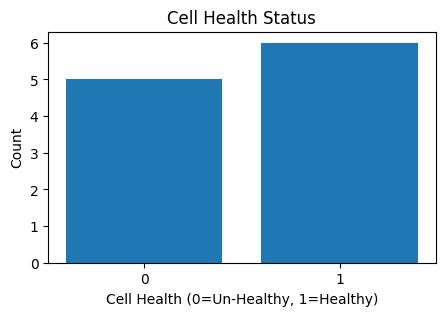

In [111]:
df2 = df_customer['Cell_Health'].value_counts()

display(df_customer['Cell_Health'].value_counts())
plt.figure(figsize=(5, 3))
plt.bar(df2.index, df2.values)
plt.title("Cell Health Status")
plt.xlabel("Cell Health (0=Un-Healthy, 1=Healthy)")
plt.ylabel("Count")
plt.xticks(df2.index)
plt.show()

***Show the cell status wrt Sites***

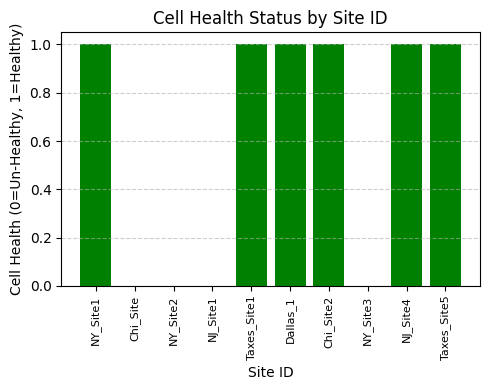

In [112]:
df3 = df_customer['Site_ID']
df4 = df_customer['Cell_Health']
#print(df3)
#print(df4)
plt.figure(figsize=(5, 4))
plt.bar(df3, df4, color='green')
plt.title('Cell Health Status by Site ID')
plt.xlabel('Site ID')
plt.ylabel('Cell Health (0=Un-Healthy, 1=Healthy)')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

***Cell Health Status by Region***

<Figure size 600x500 with 0 Axes>

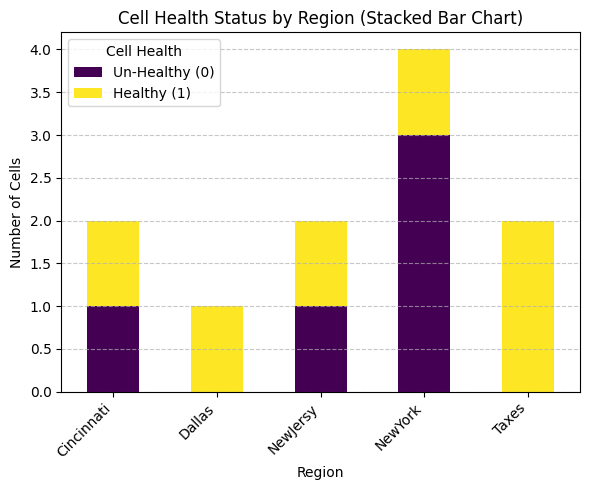

In [124]:
cell_health_by_region = df_customer.groupby(['Region', 'Cell_Health']).size().unstack(fill_value=0)

plt.figure(figsize=(6, 5))
cell_health_by_region.plot(kind='bar', stacked=True, figsize=(6, 5), colormap='viridis')
plt.title('Cell Health Status by Region (Stacked Bar Chart)')
plt.xlabel('Region')
plt.ylabel('Number of Cells')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(title='Cell Health', labels=['Un-Healthy (0)', 'Healthy (1)']) # Add a legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

***Cell Health Status by Region with different cell health status Bar***

<Figure size 1700x1200 with 0 Axes>

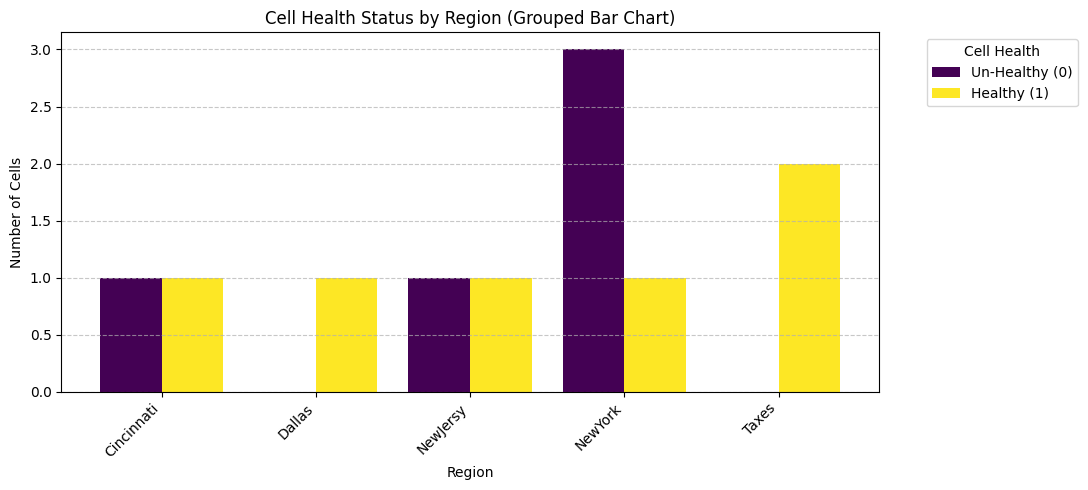

In [150]:
cell_health_by_region = df_customer.groupby(['Region', 'Cell_Health']).size().unstack(fill_value=0)

plt.figure(figsize=(17, 12))
# Plotting as a grouped bar chart (stacked=False is the default, but explicit for clarity)
cell_health_by_region.plot(kind='bar', figsize=(11, 5), colormap='viridis', width=0.8)

plt.title('Cell Health Status by Region (Grouped Bar Chart)')
plt.xlabel('Region')
plt.ylabel('Number of Cells')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability, removed bbox_to_anchor
plt.legend(title='Cell Health', labels=['Un-Healthy (0)', 'Healthy (1)'], loc='upper left', bbox_to_anchor=(1.05, 1)) # Moved legend outside
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Display the seprate plot for ERAB_Drop_Rate, RRC_Success_Rate and Cell_Health wrt Site ID and It will help to analysis the KPI degrade issue **

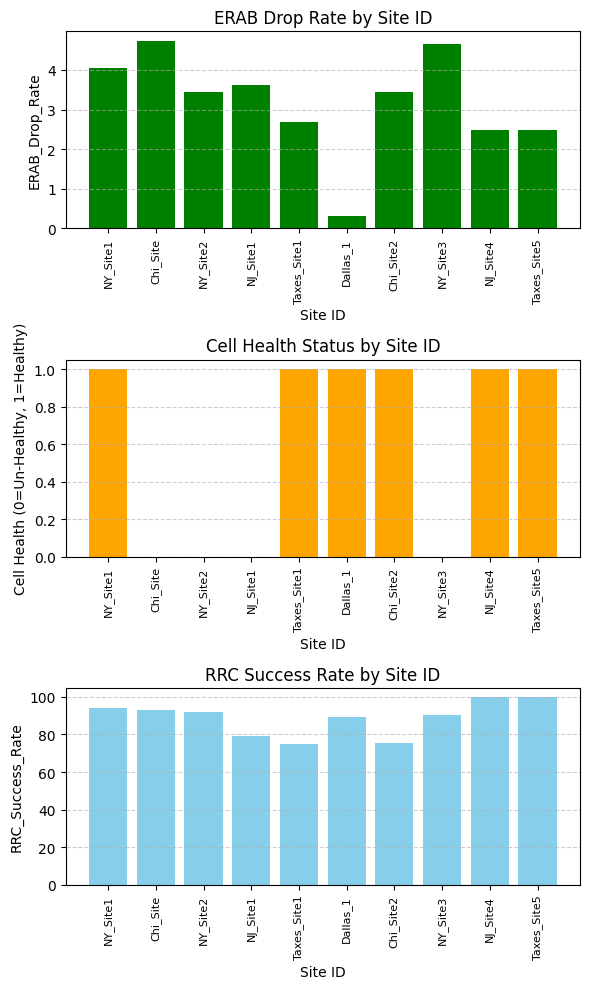

In [126]:
df3 = df_customer['Site_ID']
df4 = df_customer['ERAB_Drop_Rate']
df5 = df_customer['Cell_Health']
df6 = df_customer['RRC_Success_Rate']

plt.figure(figsize=(6, 10)) # Adjust figure size to accommodate three subplots

# Subplot 1: ERAB Drop Rate by Site ID
plt.subplot(3, 1, 1) # 3 rows, 1 column, 1st plot
plt.bar(df3, df4, color='green')
plt.title('ERAB Drop Rate by Site ID')
plt.xlabel('Site ID')
plt.ylabel('ERAB_Drop_Rate')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Subplot 2: Cell Health by Site ID
plt.subplot(3, 1, 2) # 3 rows, 1 column, 2nd plot
plt.bar(df3, df5, color='orange')
plt.title('Cell Health Status by Site ID')
plt.xlabel('Site ID')
plt.ylabel('Cell Health (0=Un-Healthy, 1=Healthy)')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Subplot 3: RRC Success Rate by Site ID
plt.subplot(3, 1, 3) # 3 rows, 1 column, 3rd plot
plt.bar(df3, df6, color='skyblue')
plt.title('RRC Success Rate by Site ID')
plt.xlabel('Site ID')
plt.ylabel('RRC_Success_Rate')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
#df_customer= pd.read_csv("/content/customer_purchase_behavior.csv")
#df_customer.info()
#df_customer.describe()
#pd.DataFrame(df_customer)
#without sum it will print false and true value. print na value with count
#df_customer.isnull().sum()
# missing/remove null data handle
#df_customer.dropna()
#df_customer.info()
#df_customer.head()
#df_customer['Income']=df_customer['Income'].fillna(df_customer['Income'].median)
#print(df_customer[['Income', 'Age']])
#df_customer.info()

**Display the combine plot for ERAB_Drop_Rate, RRC_Success_Rate and Cell_Health wrt Site ID. It will help to analysis the parameter as same plot and analysis the KPI degrade issue**

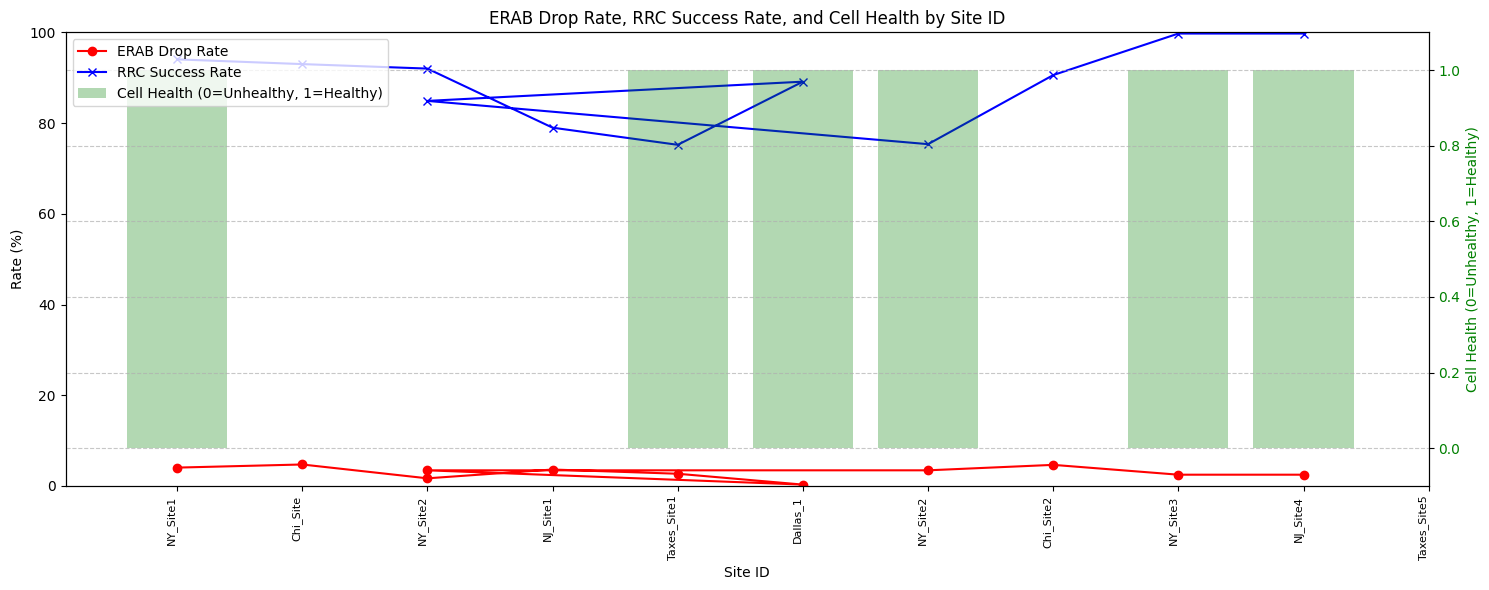

In [141]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot ERAB_Drop_Rate and RRC_Success_Rate on the primary y-axis
ax1.plot(df_customer['Site_ID'], df_customer['ERAB_Drop_Rate'], color='red', label='ERAB Drop Rate', marker='o')
ax1.plot(df_customer['Site_ID'], df_customer['RRC_Success_Rate'], color='blue', label='RRC Success Rate', marker='x')
ax1.set_xlabel('Site ID')
ax1.set_ylabel('Rate (%)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 100) # Assuming rates are between 0 and 100

# Create a secondary y-axis for Cell_Health
ax2 = ax1.twinx()
ax2.bar(df_customer['Site_ID'], df_customer['Cell_Health'], color='green', alpha=0.3, label='Cell Health (0=Unhealthy, 1=Healthy)')
ax2.set_ylabel('Cell Health (0=Unhealthy, 1=Healthy)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(-0.1, 1.1) # Cell Health is typically 0 or 1, added some padding

# Set title and rotate x-axis labels
plt.title('ERAB Drop Rate, RRC Success Rate, and Cell Health by Site ID')
ax1.set_xticks(range(len(df_customer['Site_ID'])))
ax1.set_xticklabels(df_customer['Site_ID'], rotation=90, ha='right', fontsize=8)

# Add legend from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Display the combine plot for DL_Throughput, ERAB_Drop_Rate, RRC_Success_Rate and Cell_Health wrt Site ID. It will help to analysis the KPI degrade issue**

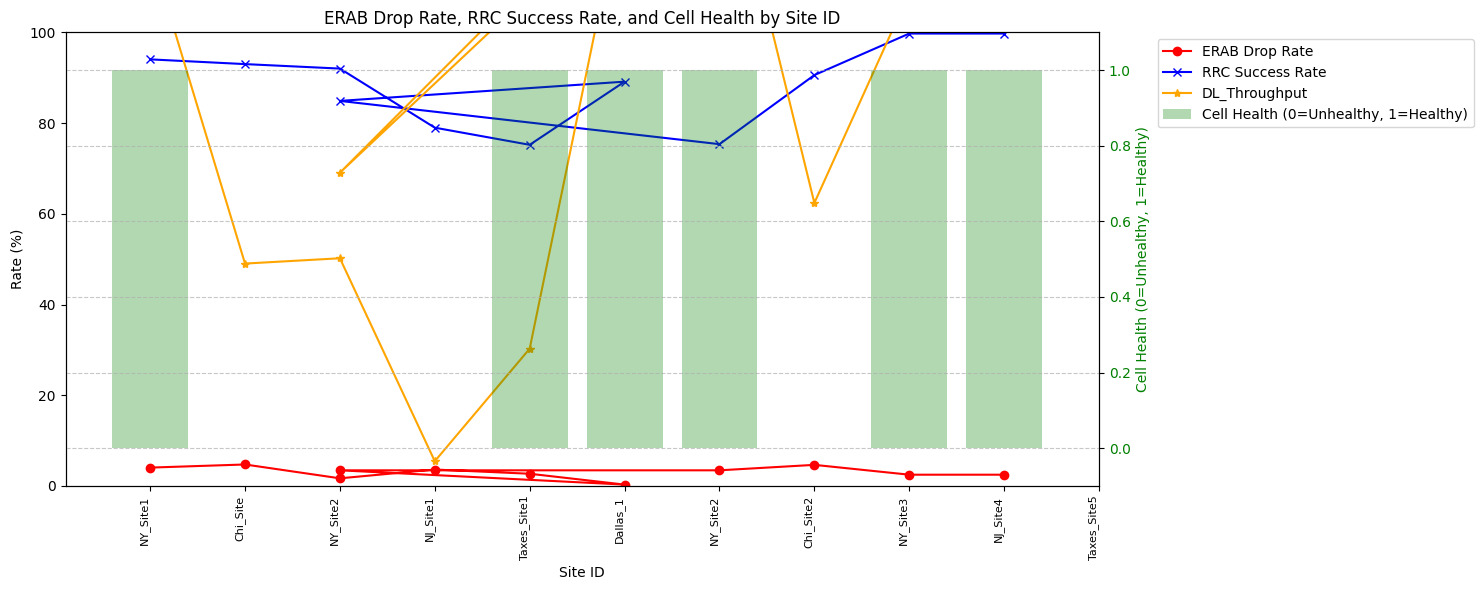

In [138]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot ERAB_Drop_Rate and RRC_Success_Rate on the primary y-axis
ax1.plot(df_customer['Site_ID'], df_customer['ERAB_Drop_Rate'], color='red', label='ERAB Drop Rate', marker='o')
ax1.plot(df_customer['Site_ID'], df_customer['RRC_Success_Rate'], color='blue', label='RRC Success Rate', marker='x')
ax1.plot(df_customer['Site_ID'], df_customer['DL_Throughput'], color='orange', label='DL_Throughput', marker='*')
ax1.set_xlabel('Site ID')
ax1.set_ylabel('Rate (%)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 100) # Assuming rates are between 0 and 100

# Create a secondary y-axis for Cell_Health
ax2 = ax1.twinx()
ax2.bar(df_customer['Site_ID'], df_customer['Cell_Health'], color='green', alpha=0.3, label='Cell Health (0=Unhealthy, 1=Healthy)')
ax2.set_ylabel('Cell Health (0=Unhealthy, 1=Healthy)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(-0.1, 1.1) # Cell Health is typically 0 or 1, added some padding

# Set title and rotate x-axis labels
plt.title('ERAB Drop Rate, RRC Success Rate, and Cell Health by Site ID')
ax1.set_xticks(range(len(df_customer['Site_ID'])))
ax1.set_xticklabels(df_customer['Site_ID'], rotation=90, ha='right', fontsize=8)

# Add legend from both axes and place it outside the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Display the combine plot for DL_Throughput, ERAB_Drop_Rate, and RRC_Success_Rate wrt Site ID. It will help to analysis the KPI degrade issue**

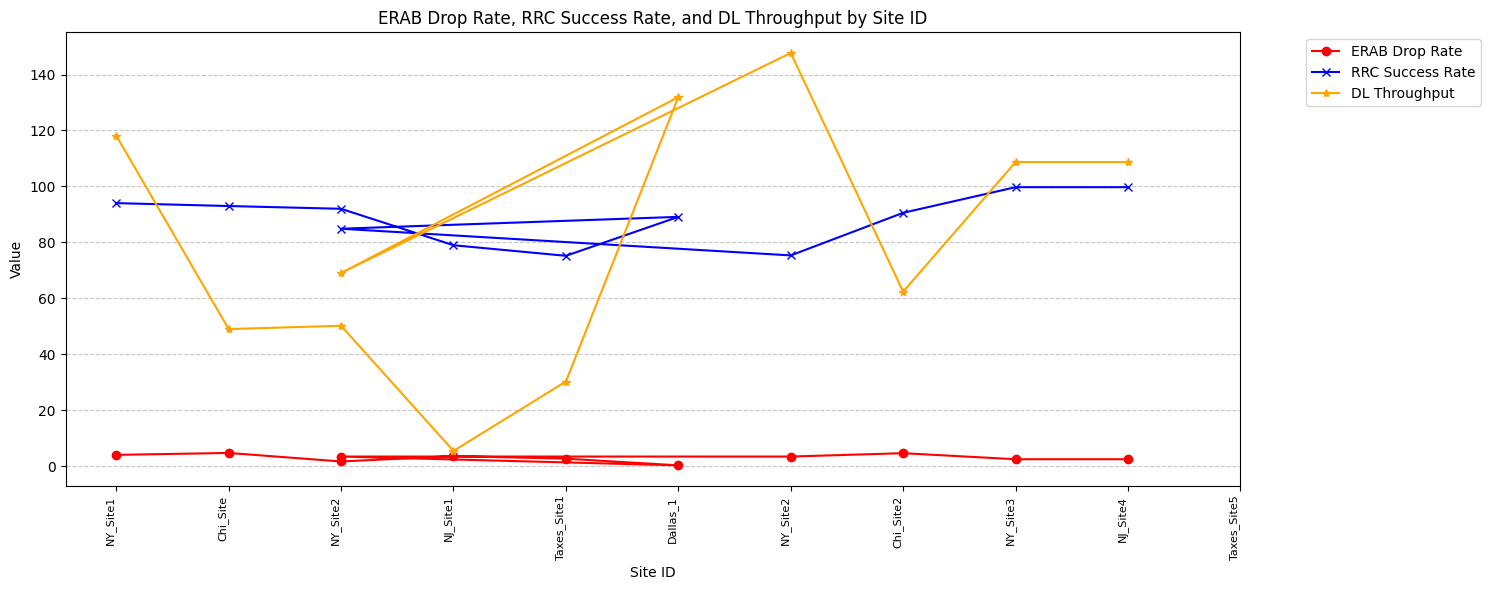

In [139]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot ERAB_Drop_Rate, RRC_Success_Rate, and DL_Throughput on the primary y-axis
ax1.plot(df_customer['Site_ID'], df_customer['ERAB_Drop_Rate'], color='red', label='ERAB Drop Rate', marker='o')
ax1.plot(df_customer['Site_ID'], df_customer['RRC_Success_Rate'], color='blue', label='RRC Success Rate', marker='x')
ax1.plot(df_customer['Site_ID'], df_customer['DL_Throughput'], color='orange', label='DL Throughput', marker='*')

ax1.set_xlabel('Site ID')
ax1.set_ylabel('Value', color='black') # General label for the y-axis since it now holds different types of values
ax1.tick_params(axis='y', labelcolor='black')
# Removed set_ylim(0, 100) as DL_Throughput might exceed this range

# Set title and rotate x-axis labels
plt.title('ERAB Drop Rate, RRC Success Rate, and DL Throughput by Site ID')
ax1.set_xticks(range(len(df_customer['Site_ID'])))
ax1.set_xticklabels(df_customer['Site_ID'], rotation=90, ha='right', fontsize=8)

# Add legend
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

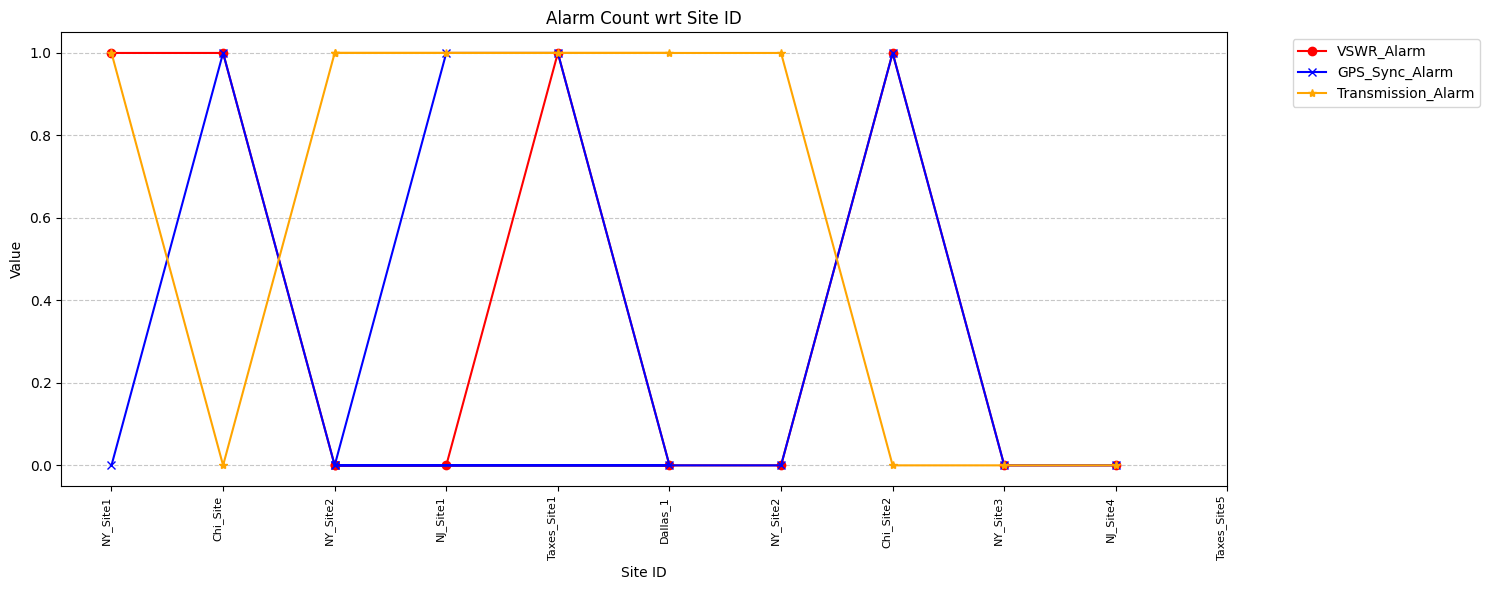

In [161]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(df_customer['Site_ID'], df_customer['VSWR_Alarm'], color='red', label='VSWR_Alarm', marker='o')
ax1.plot(df_customer['Site_ID'], df_customer['GPS_Sync_Alarm'], color='blue', label='GPS_Sync_Alarm', marker='x')
ax1.plot(df_customer['Site_ID'], df_customer['Transmission_Alarm'], color='orange', label='Transmission_Alarm', marker='*')

ax1.set_xlabel('Site ID')
ax1.set_ylabel('Value', color='black') # General label for the y-axis since it now holds different types of values
ax1.tick_params(axis='y', labelcolor='black')


# Set title and rotate x-axis labels
plt.title('Alarm Count wrt Site ID')
ax1.set_xticks(range(len(df_customer['Site_ID'])))
ax1.set_xticklabels(df_customer['Site_ID'], rotation=90, ha='right', fontsize=8)

# Add legend
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

******Display the overall alarm count in the network******

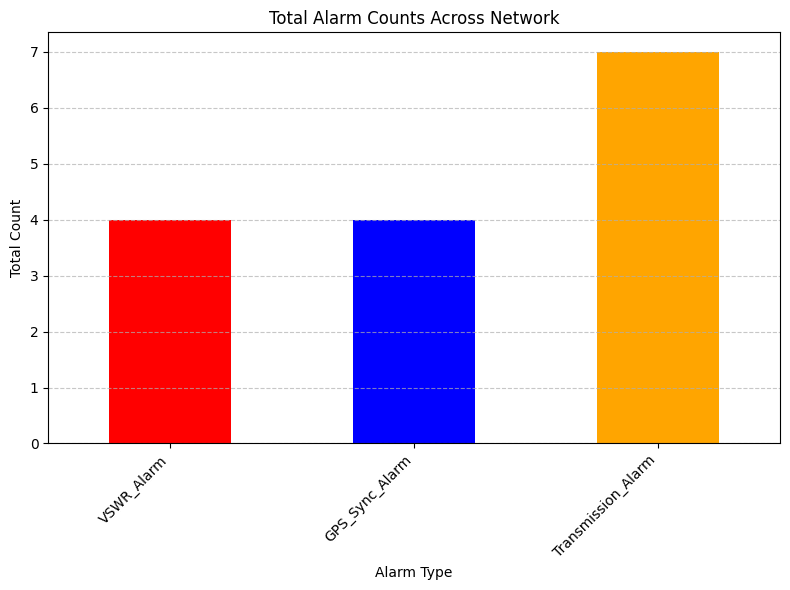

In [162]:
alarm_counts = df_customer[['VSWR_Alarm', 'GPS_Sync_Alarm', 'Transmission_Alarm']].sum()

plt.figure(figsize=(8, 6))
alarm_counts.plot(kind='bar', color=['red', 'blue', 'orange'])
plt.title('Total Alarm Counts Across Network')
plt.xlabel('Alarm Type')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***Display the alarm count wrt Region***

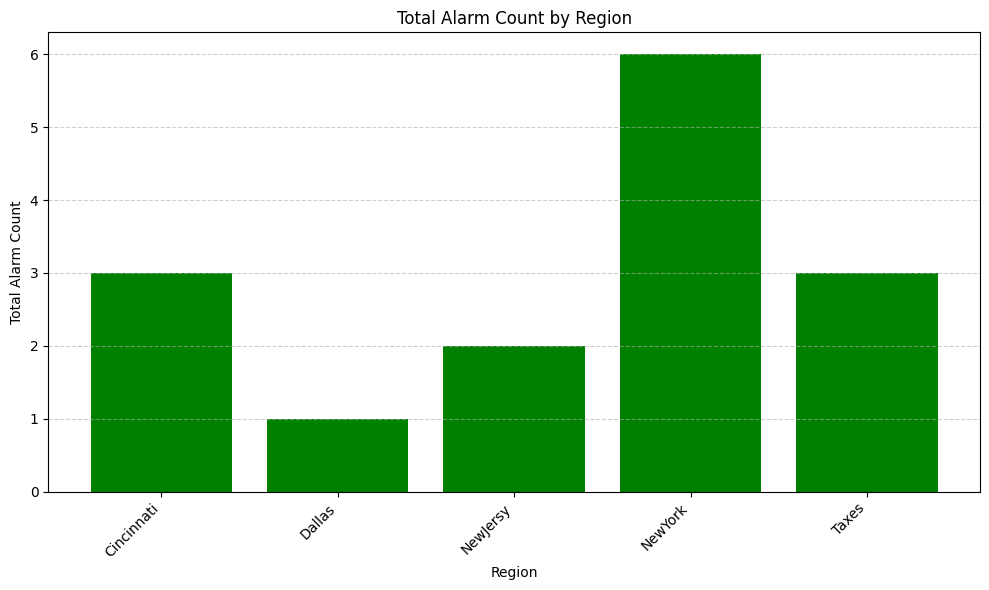

In [164]:
alarm_columns = ['VSWR_Alarm', 'GPS_Sync_Alarm', 'Transmission_Alarm']
alarm_counts_by_region = df_customer.groupby('Region')[alarm_columns].sum().sum(axis=1)

plt.figure(figsize=(10, 6))
plt.bar(alarm_counts_by_region.index, alarm_counts_by_region.values, color='green')
plt.title('Total Alarm Count by Region')
plt.xlabel('Region')
plt.ylabel('Total Alarm Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

***Catagories the alarm count wrt Region***

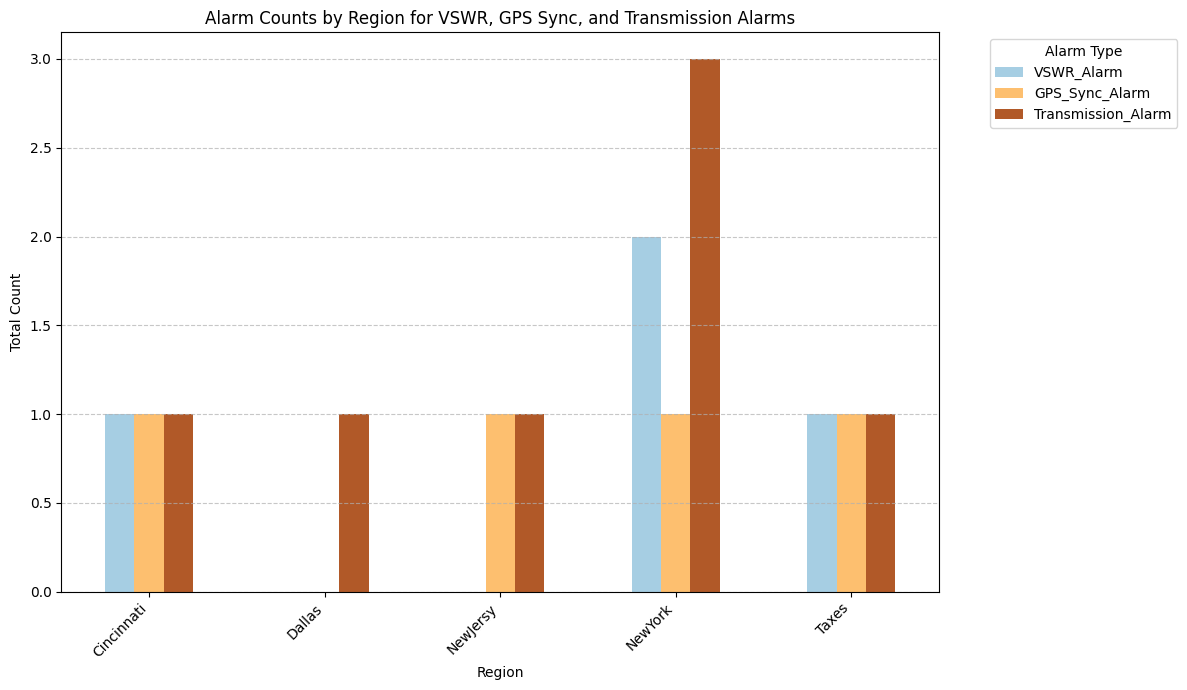

In [170]:
alarm_columns = ['VSWR_Alarm', 'GPS_Sync_Alarm', 'Transmission_Alarm']
alarm_counts_by_region_detailed = df_customer.groupby('Region')[alarm_columns].sum()

alarm_counts_by_region_detailed.plot(kind='bar', figsize=(12, 7), rot=45, colormap='Paired')
plt.title('Alarm Counts by Region for VSWR, GPS Sync, and Transmission Alarms')
plt.xlabel('Region')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Alarm Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()